<a href="https://colab.research.google.com/github/Tofupaste/Projectbased_RNN/blob/main/Projectbased_RNN_90_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch import nn
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import os
import torch
import scipy
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import matplotlib.dates as mdates
import statsmodels.api as sm
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose, MSTL, STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
import math
import yfinance as yf
import datetime as dt

1. Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/RNN/train.csv')
print(len(train))
train.head()

43775


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/RNN/Test_Jan.csv')
print(len(test))
test.head()

744


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,01-01-2020 00:00,0,25.809259,0.018042,0.032806,14.849625,23.301447,0.017035,0.021866,4.559083,22.598322,0.016195,0.068054,3.737708,1,1,0
1,01-01-2020 01:00,0,25.650842,0.018065,0.053177,15.933757,23.041467,0.016936,0.023796,4.846412,22.471155,0.016104,0.080109,3.591759,1,1,0
2,01-01-2020 02:00,0,25.501489,0.018119,0.069000,16.806818,22.806177,0.016822,0.024910,5.204608,22.368677,0.016013,0.094757,3.704177,1,1,0
3,01-01-2020 03:00,0,25.430994,0.018142,0.080017,17.460632,22.657556,0.016746,0.025208,5.628076,22.282556,0.015937,0.107086,3.936592,1,1,0
4,01-01-2020 04:00,0,25.360132,0.018204,0.084137,16.632112,22.539819,0.016647,0.022789,5.729821,22.203882,0.015862,0.113800,4.088643,1,1,0


In [ ]:
predict = pd.read_csv('/content/drive/MyDrive/RNN/Predict_Jan.csv')
print(len(predict))
predict.head()

744


,datetime,nat_demand
0,01-01-2020 00:00,1032.2630
1,01-01-2020 01:00,1017.5806
2,01-01-2020 02:00,1000.2797
3,01-01-2020 03:00,987.2383
4,01-01-2020 04:00,970.3667


==== VISUALISASI DATA

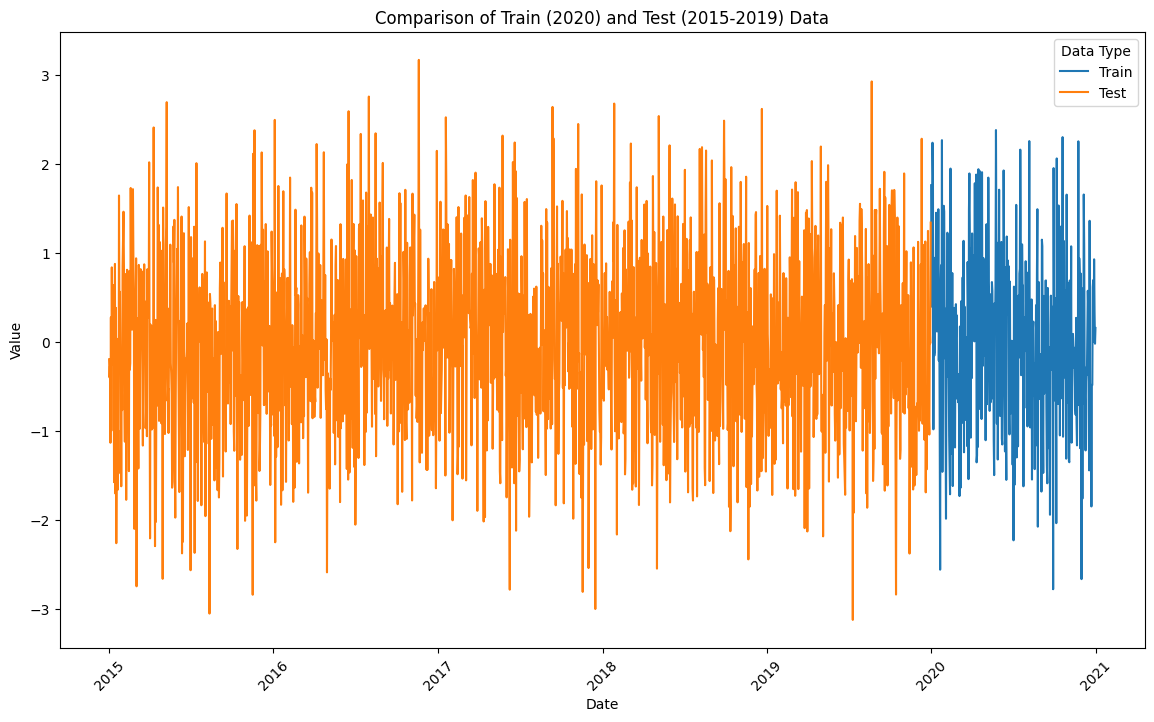

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
# Generate random data for demonstration purposes
np.random.seed(0)
train_data = np.random.randn(366)  # 2020 is a leap year

# Calculate the number of days in the test period (2015-2019)
test_period_start = pd.to_datetime('2015-01-01')
test_period_end = pd.to_datetime('2019-12-31')
num_test_days = (test_period_end - test_period_start).days + 1

test_data = np.random.randn(num_test_days)

# Generate date ranges
train_dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
test_dates = pd.date_range(start='2015-01-01', end='2019-12-31', freq='D')

# Ensure the lengths match
assert len(train_dates) == len(train_data)
assert len(test_dates) == len(test_data)

# Create DataFrames for easier plotting
train_df = pd.DataFrame({
    'Date': train_dates,
    'Value': train_data,
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Date': test_dates,
    'Value': test_data,
    'Type': 'Test'
})

# Combine the data
data = pd.concat([train_df, test_df])

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Date', y='Value', hue='Type')
plt.title('Comparison of Train (2020) and Test (2015-2019) Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Data Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Holiday ID:", train['Holiday_ID'].unique())
print("Holiday:", train['holiday'].unique())
print("School:", train['school'].unique())


Holiday ID: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22  1]
Holiday: [0 1]
School: [0 1]


In [ ]:
train[['Holiday_ID','holiday','school']].value_counts()

Holiday_ID  holiday  school
0           0        1         30864
                     0         10175
21          1        0           144
12          1        1           144
16          1        1           144
19          1        1           144
1           1        0           120
2           1        0           120
6           1        0           120
5           1        0           120
4           1        0           120
3           1        0           120
10          1        1           120
7           1        0           120
9           1        1           120
8           1        1           120
14          1        1           120
13          1        1           120
11          1        1           120
15          1        1           120
18          1        1           120
17          1        1           120
20          1        0           120
22          1        0           120
Name: count, dtype: int64

In [ ]:
train.index=pd.to_datetime(train['datetime'],format="%d-%m-%Y %H:%M")
train=train.drop('datetime',axis=1)

Making data into 90 / 10

In [ ]:
# setting 90% of the data as training data
import math
train_data_len = math.ceil(len(train) * .9)
train_data_len

# splitting the dataset
train_split = train[:train_data_len].iloc[:,:1]
test_split = train[train_data_len:].iloc[:,:1]
print(train_split.shape, test_split.shape)

(39398, 1) (4377, 1)


Minmax Scaller

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train_split)

print(train_scaled[:5])

[[0.54175827]
 [0.50615558]
 [0.49886807]
 [0.49255477]
 [0.49483937]]


In [ ]:
test_data = test_split.iloc[:, 0].values  # Select all rows (:) and the first column (0)

# reshape to 2d array
test_data = np.reshape(test_data, (-1,1))

# applying minmax in test
test_scaled = scaler.fit_transform(test_data)
print(*test_scaled[:5])

[0.7072641] [0.61457059] [0.50458802] [0.52278753] [0.58677169]


======= Devided x_train and y_train

In [ ]:
X_train = []
y_train = []
for i in range(50, len(train_scaled)):
    X_train.append(train_scaled[i-50:i, 0])
    y_train.append(train_scaled[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

[array([0.54175827, 0.50615558, 0.49886807, 0.49255477, 0.49483937,
       0.48599267, 0.51858761, 0.58988198, 0.66267648, 0.71751593,
       0.71572635, 0.69266269, 0.68363812, 0.68064274, 0.66334729,
       0.64357928, 0.62230396, 0.62542291, 0.64691458, 0.61942041,
       0.60560091, 0.58520126, 0.55968462, 0.5403552 , 0.52566782,
       0.51628122, 0.50455268, 0.49543171, 0.48931831, 0.47605082,
       0.48137474, 0.50635211, 0.54142574, 0.57172764, 0.59647848,
       0.60262084, 0.61333197, 0.61326042, 0.60604526, 0.59443454,
       0.58054876, 0.62205865, 0.64386694, 0.64143881, 0.62256396,
       0.60433176, 0.56761802, 0.53458252, 0.51616769, 0.49964623])]
[0.4912256402265225]

[array([0.54175827, 0.50615558, 0.49886807, 0.49255477, 0.49483937,
       0.48599267, 0.51858761, 0.58988198, 0.66267648, 0.71751593,
       0.71572635, 0.69266269, 0.68363812, 0.68064274, 0.66334729,
       0.64357928, 0.62230396, 0.62542291, 0.64691458, 0.61942041,
       0.60560091, 0.58520126, 0.559

In [ ]:
X_test = []
y_test = []
for i in range(50, len(test_scaled)):
    X_test.append(test_scaled[i-50:i, 0])
    y_test.append(test_scaled[i, 0])
    if i <= 51:
        print(X_test)
        print(y_test)
        print()

[array([0.7072641 , 0.61457059, 0.50458802, 0.52278753, 0.58677169,
       0.56608654, 0.53290827, 0.45987457, 0.39446128, 0.31851163,
       0.23917376, 0.22894509, 0.20748715, 0.20065522, 0.22670294,
       0.23958628, 0.4062489 , 0.59628712, 0.67269933, 0.75818152,
       0.78508534, 0.78741553, 0.77551102, 0.75639311, 0.69029784,
       0.61904825, 0.53814855, 0.52199353, 0.59624889, 0.57265067,
       0.52113855, 0.47305233, 0.40944324, 0.32392768, 0.28650387,
       0.25791339, 0.22791842, 0.22471556, 0.2344388 , 0.22726892,
       0.37455279, 0.58493953, 0.70022369, 0.79277303, 0.8304221 ,
       0.83255156, 0.85693439, 0.88819996, 0.86178026, 0.7750215 ])]
[0.6289379708551492]

[array([0.7072641 , 0.61457059, 0.50458802, 0.52278753, 0.58677169,
       0.56608654, 0.53290827, 0.45987457, 0.39446128, 0.31851163,
       0.23917376, 0.22894509, 0.20748715, 0.20065522, 0.22670294,
       0.23958628, 0.4062489 , 0.59628712, 0.67269933, 0.75818152,
       0.78508534, 0.78741553, 0.775

==== Convert to numpy array

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (39348, 50, 1) y_train : (39348, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (4327, 50, 1) y_test : (4327, 1)


===== RNN Model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Using simpleRNN

In [ ]:
# initializing the RNN
model = Sequential()

# adding RNN layers and dropout regularization
model.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

model.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

model.add( SimpleRNN(units = 50))

# adding the output layer
model.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.0001,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

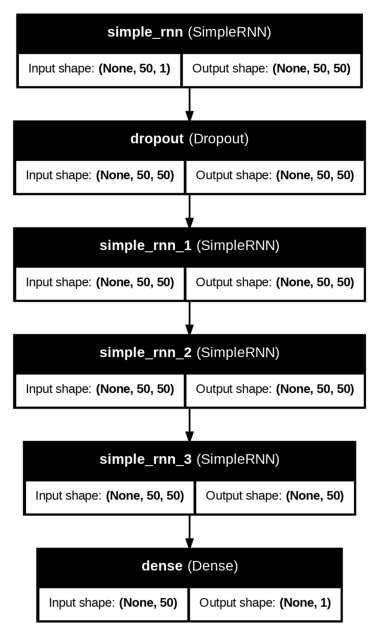

In [ ]:
# prompt: visualisasikan layer nya

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model' as defined in the provided code
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot in the notebook
plt.figure(figsize=(12, 8))
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#yang make vscode, run kan ini

# import visualkeras
# visualkeras.layered_view(model)

In [ ]:
# Mendapatkan history training
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# Menampilkan nilai loss terbaik
best_loss = min(history.history['loss'])
print(f"Nilai loss terbaik: {best_loss}")

Epoch 1/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 57s 21ms/step - loss: 0.0162
Epoch 2/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - loss: 0.0088
Epoch 3/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - loss: 0.0061
Epoch 4/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - loss: 0.0053
Epoch 5/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - loss: 0.0046
Epoch 6/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0041
Epoch 7/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - loss: 0.0038
Epoch 8/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0035
Epoch 9/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0034
Epoch 10/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - loss: 0.0032
Epoch 11/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0032
Epoch 12/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0030
Epoch 13/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0029
Epoch 14/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - loss: 0.0028
E

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


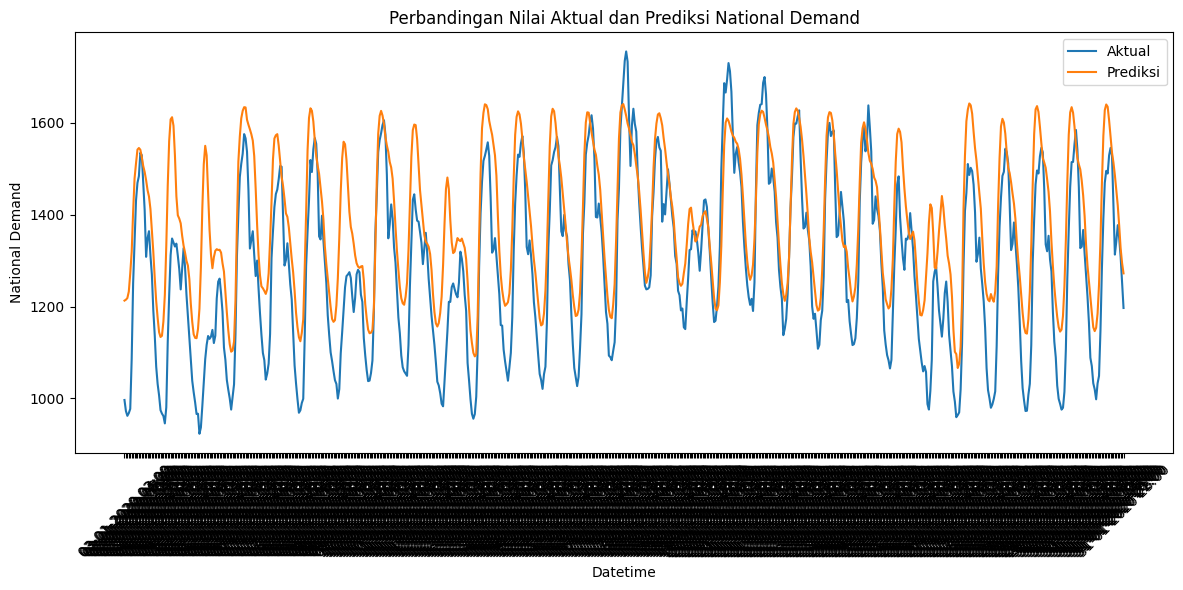

In [ ]:
import matplotlib.pyplot as plt

# Prediksi data Predict_Jan.csv
predict_scaled = scaler.transform(predict[['nat_demand']])  # Menggunakan kolom 'nat_demand'
X_predict = []
for i in range(50, len(predict_scaled)):
    X_predict.append(predict_scaled[i-50:i, 0])
X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

predicted_values = model.predict(X_predict)
predicted_values = scaler.inverse_transform(predicted_values)  # Kembalikan ke skala asli

# Plot perbandingan
plt.figure(figsize=(12, 6))
plt.plot(predict['datetime'][50:], predict['nat_demand'][50:], label='Aktual')  # Menggunakan kolom 'nat_demand'
plt.plot(predict['datetime'][50:], predicted_values, label='Prediksi')
plt.xlabel('Datetime')
plt.ylabel('National Demand')  # Mengubah label y-axis
plt.title('Perbandingan Nilai Aktual dan Prediksi National Demand')  # Mengubah judul
plt.legend()
plt.xticks(rotation=45)  # Memutar label x-axis agar mudah dibaca
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

===== LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


#Initialising the model
modelLSTM = Sequential()

#Adding LSTM layers
modelLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (X_train.shape[1],1)))
modelLSTM.add(LSTM(50,
                       return_sequences = False))
modelLSTM.add(Dense(25))

#Adding the output layer
modelLSTM.add(Dense(1))

# Compiling the model
modelLSTM.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=["accuracy"])

# Display the model summary
modelLSTM.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

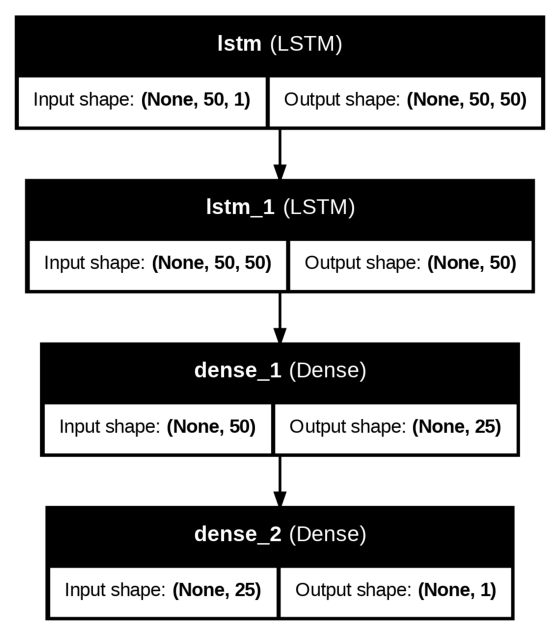

In [ ]:
# prompt: visualisasikan layer nya

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model' as defined in the provided code
plot_model(modelLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot in the notebook
plt.figure(figsize=(12, 8))
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Fitting the model
history = modelLSTM.fit(X_train, y_train, batch_size=16, epochs=20)

# Menampilkan nilai loss terbaik
best_loss = min(history.history['loss'])
print(f"Nilai loss terbaik: {best_loss}")

Epoch 1/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 1.0980e-05 - loss: 0.0356
Epoch 2/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 2.0560e-05 - loss: 0.0023
Epoch 3/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 1.4358e-05 - loss: 0.0016
Epoch 4/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 9.2290e-06 - loss: 0.0012
Epoch 5/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 2.9929e-05 - loss: 8.5413e-04
Epoch 6/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 2.7283e-05 - loss: 6.7190e-04
Epoch 7/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 3.7108e-05 - loss: 5.3171e-04
Epoch 8/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 5.2405e-05 - loss: 4.9410e-04
Epoch 9/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 2.1224e-05 - loss: 4.5006e-04
Epoch 10/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 3.0229e-05 - loss: 4.5449e-04
Epoch 11/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 40

Nilai loss terbaik: 0.0003268748405389488
 1/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


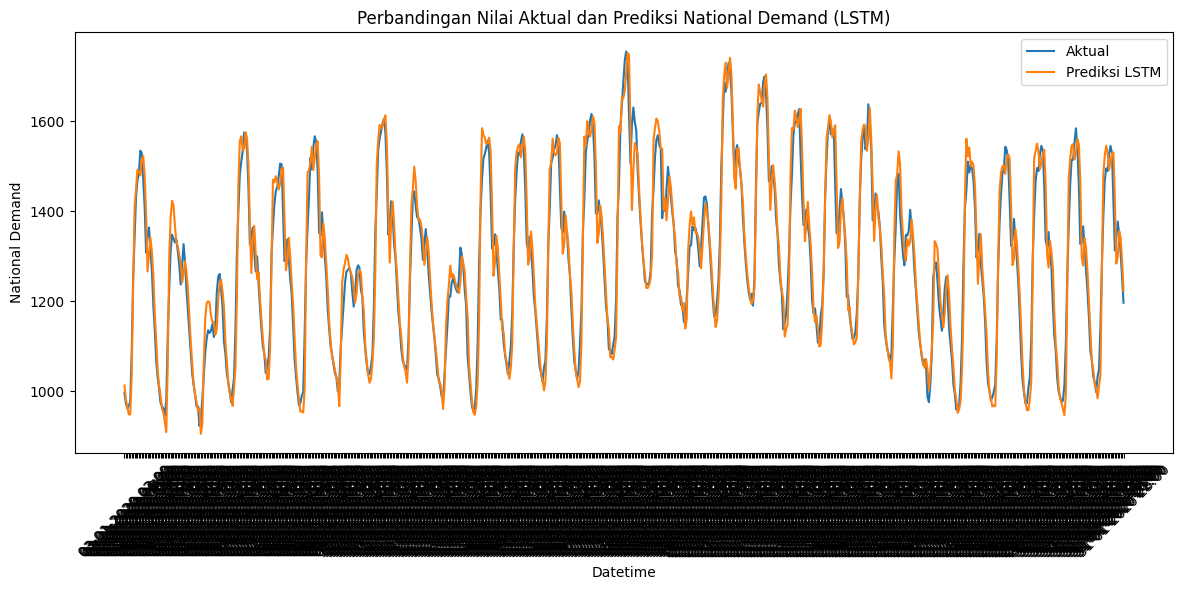

In [ ]:
# Menampilkan nilai loss terbaik
best_loss = min(history.history['loss'])
print(f"Nilai loss terbaik: {best_loss}")

# Prediksi data Predict_Jan.csv using LSTM
predict_scaled = scaler.transform(predict[['nat_demand']])
X_predict = []
for i in range(50, len(predict_scaled)):
    X_predict.append(predict_scaled[i-50:i, 0])
X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

predicted_values_lstm = modelLSTM.predict(X_predict)
predicted_values_lstm = scaler.inverse_transform(predicted_values_lstm)

# Plot perbandingan LSTM
plt.figure(figsize=(12, 6))
plt.plot(predict['datetime'][50:], predict['nat_demand'][50:], label='Aktual')
plt.plot(predict['datetime'][50:], predicted_values_lstm, label='Prediksi LSTM')
plt.xlabel('Datetime')
plt.ylabel('National Demand')
plt.title('Perbandingan Nilai Aktual dan Prediksi National Demand (LSTM)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

====== GRU RNN

In [ ]:
#Initialising the model
modelGRU = Sequential()

# GRU layers with Dropout regularisation
modelGRU.add(GRU(units=50,
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

modelGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

modelGRU.add(GRU(units=50,
                     activation='tanh'))

# The output layer
modelGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
modelGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   decay=1e-7,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

modelGRU.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

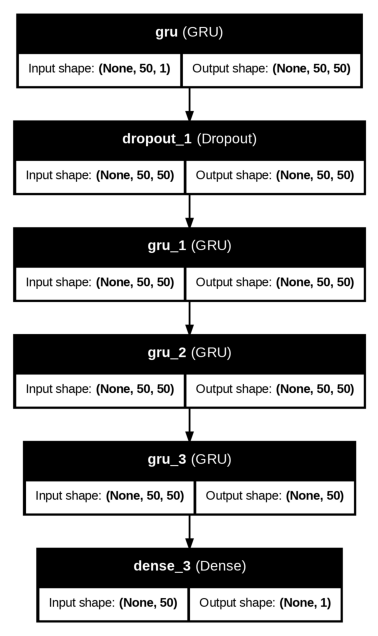

In [ ]:
# prompt: visualisasikan layer nya

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model' as defined in the provided code
plot_model(modelGRU, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot in the notebook
plt.figure(figsize=(12, 8))
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Fitting the data
history = modelGRU.fit(X_train,y_train,epochs=20,batch_size=16)

# Menampilkan nilai loss terbaik
best_loss = min(history.history['loss'])
print(f"Nilai loss terbaik: {best_loss}")

Epoch 1/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 0.0159
Epoch 2/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 0.0038
Epoch 3/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0027
Epoch 4/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0023
Epoch 5/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0019
Epoch 6/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 0.0018
Epoch 7/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.0016
Epoch 8/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0015
Epoch 9/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0014
Epoch 10/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0014
Epoch 11/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0013
Epoch 12/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0012
Epoch 13/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0012
Epoch 14/20
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0011
E

Nilai loss terbaik: 0.0009728800505399704


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


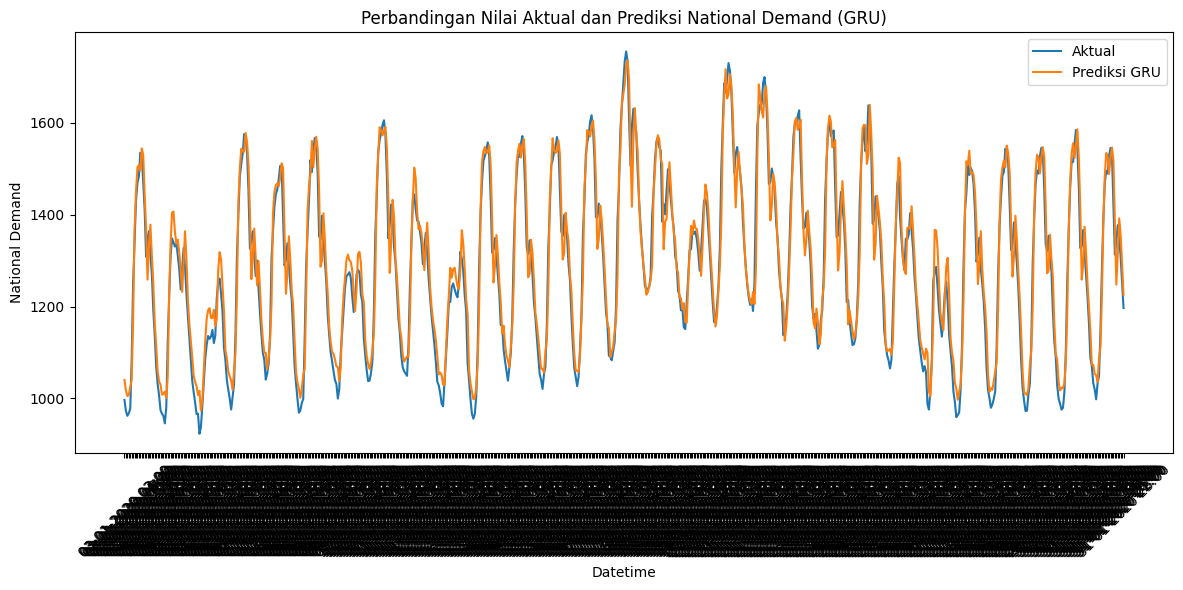

In [ ]:
# Menampilkan nilai loss terbaik
best_loss = min(history.history['loss'])
print(f"Nilai loss terbaik: {best_loss}")

# Prediksi data Predict_Jan.csv using LSTM
predict_scaled = scaler.transform(predict[['nat_demand']])
X_predict = []
for i in range(50, len(predict_scaled)):
    X_predict.append(predict_scaled[i-50:i, 0])
X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

predicted_values_GRU = modelGRU.predict(X_predict)
predicted_values_GRU = scaler.inverse_transform(predicted_values_GRU)

# Plot perbandingan GRU
plt.figure(figsize=(12, 6))
plt.plot(predict['datetime'][50:], predict['nat_demand'][50:], label='Aktual')
plt.plot(predict['datetime'][50:], predicted_values_GRU, label='Prediksi GRU')
plt.xlabel('Datetime')
plt.ylabel('National Demand')
plt.title('Perbandingan Nilai Aktual dan Prediksi National Demand (GRU)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()